<a href="https://colab.research.google.com/github/SampMark/Machine-Learning/blob/main/Perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Algoritmo de Perceptron**

O Perceptron é um dos algoritmos mais simples de aprendizado supervisionado e um dos primeiros modelos de redes neurais artificiais. O Perceptron serviu de base para o desenvolvimento de modelos mais avançados, como o **Perceptron Multicamadas (MLP)**, utilizado em **Redes Neurais** modernas.

O Perceptron é um classificador linear utilizado para dividir dados em duas classes separáveis, que ajusta os pesos iterativamente para encontrar uma reta ou hiperplano (no caso de dimensões maiores) que separa os dados de maneira ótima, caso sejam linearmente separáveis.

O algoritmo Perceptron recebe as seguintes entradas:

* Um **conjunto de treinamento** de exemplos rotulados, onde cada exemplo consiste em um vetor de características (x) e um rótulo correspondente (y).
* O número de iterações (T) para executar o algoritmo.

O algoritmo inicializa um vetor de parâmetros $(θ)$ para 0 e itera pelo conjunto de treinamento $T$ vezes. Para cada exemplo, o Perceptron verifica se o classificador atual classifica incorretamente o exemplo. Se isso acontecer, o algoritmo atualiza o vetor de parâmetros para corrigir o erro.

O Perceptron aprende ajustando os pesos e o viés para corrigir erros. A cada erro cometido, a regra de atualização move a fronteira de decisão na direção do exemplo mal classificado, tornando a predição futura mais provável de estar correta.

O algoritmo Perceptron é simples e poderoso, que pode ser usado para aprender classificadores lineares. É garantido que ele encontre uma solução viável, se o conjunto de treinamento for linearmente separável.

### **Funcionamento do Algoritmo Perceptron**

O Perceptron aprende ajustando os pesos $ \theta $ e o viés $ \theta_0 $ para corrigir erros. Cada vez que um erro ocorre, a **regra de atualização** move a fronteira de decisão na **direção do exemplo mal classificado**, tornando mais provável que futuras previsões estejam corretas.

Se o conjunto de dados for **linearmente separável**, é **garantido** o algoritmo convergir para uma solução que separá perfeitamente as classes em um número finito de iterações. No entanto, se os dados **não forem linearmente separáveis**, o Perceptron nunca convergirá e continuará realizando atualizações indefinidamente. A seguir uma breve descrição das etapas de funcionamento:

1. **Inicialização**: começa com um vetor de pesos $\theta$ inicializado com zeros ou valores pequenos aleatórios.
2. **Predição**: para cada ponto de dados $x^{(i)}$, calcula a previsão $ \hat{y}^{(i)} = \text{sign}(\theta \cdot x^{(i)}) $.
3. **Atualização**: caso a previsão esteja incorreta (ou seja, $ \hat{y}^{(i)} \neq y^{(i)} $), atualiza o vetor de pesos: $ \theta = \theta + y^{(i)} x^{(i)} $.
4. **Iteração**: repite o processo até que todos os pontos de dados sejam classificados corretamente ou até que um número máximo de iterações seja atingido.

## **Definição Matemática**

Dado um **conjunto de treinamento** $ S = \{(x^{(i)}, y^{(i)})\}_{i=1}^{n} $, composto por $n$ amostras:

$$
(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)
$$

onde:

- $x_i \in \mathbb{R}^d$ é um vetor de características do exemplo $i$,
- $y_i \in \{-1, 1\}$ é o rótulo associado a $x_i$.

O Perceptron aprende um vetor de pesos $w$ tal que a predição seja dada por:

$$
\hat{y} = \text{sign}(w \cdot x + b)
$$

Onde:
* $b$ é o viés (bias), e;
* $\text{sign}(\cdot)$ é a função que retorna $1$ se o valor for positivo e $-1$ caso contrário.

O **algoritmo de atualização** do Perceptron segue os seguintes passos:

1. Inicializa $w = 0$ e $b = 0$.
2. Para cada amostra $(x_i, y_i)$:
   - Se $y_i(w \cdot x_i + b) \leq 0$, atualiza:

$$
w \leftarrow w + y_i x_i
$$

$$
b \leftarrow b + y_i
$$

3. O processo é repetido até que **todos os exemplos sejam classificados corretamente** ou até atingir o limite de iterações $T$.

### **Algumas Limitações do Perceptron**

- O algoritmo só funciona para **dados linearmente separáveis**.
- Não lida bem com **outliers**.
- Para problemas mais complexos, como aqueles que requerem **fronteiras de decisão não lineares**. Há outras abordagens mais robustas, como **Redes Neurais** e **SVMs** para tal.

## **Importando as bibliotecas**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Implementação do Algoritmo do Perceptron**

---
Os parâmetros do perceptron (θ e θ₀) serão atualizados sempre que um exemplo de treinamento for classificado incorretamente ou estiver na fronteira de decisão. A função `perceptron_single_step_update` verifica se a margem (produto do rótulo pelo valor da decisão) é menor ou igual a zero (considerando uma pequena tolerância ε para lidar com imprecisões numéricas). Se for, os parâmetros serão atualizados.

### **Explicação**:
1. **Cálculo da decisão e margem:**
   * `decision = np.dot(current_theta, feature_vector) + current_theta_0`: calcula o valor da função de decisão (θ·x + θ₀).
   * `margin = label * decision`: calcula a margem (produto do rótulo pelo valor da decisão).

2. **Condição de atualização:**
   * Se a margem for menor ou igual a `epsilon` (um valor próximo de zero), o exemplo é considerado mal classificado ou na fronteira, e os parâmetros são atualizados:
     - `new_theta = current_theta + (label * feature_vector)`: atualiza θ somando o vetor de características multiplicado pelo rótulo.
     - `new_theta_0 = current_theta_0 + label`: Atualiza θ₀ somando o rótulo.

3. **Tratamento de precisão numérica:**
   * `epsilon = 1e-8`: define uma tolerância para evitar erros de precisão em cálculos de ponto flutuante. Valores dentro de `[-epsilon, epsilon]` são tratados como zero.

In [2]:
def perceptron_single_step_update(feature_vector, label, current_theta, current_theta_0):
    """
    Realiza atualização de um único passo do Perceptron com base em um exemplo de treino.
    O código verifica se um exemplo de treinamento está corretamente classificado.
    Caso contrário, atualiza os pesos para melhorar a classificação.

    Parâmetros:
    feature_vector : np.array, vetor de características do exemplo de entrada.
    label : int, rótulo associado ao exemplo, assumindo valores {+1, -1}.
    current_theta : np.array, vetor de pesos atual do modelo.
    current_theta_0 : float, termo de viés (bias) atual do modelo.

    Retorno:
    new_theta : np.array, vetor de pesos atualizado, caso a classificação seja incorreta.
    new_theta_0 : float, termo de viés atualizado, caso a classificação seja incorreta.
    """
    epsilon = 1e-8  # Pequeno valor para tolerância numérica, evita problemas de arredondamento

    # Calcula a predição: θ·x + θ₀
    decision = np.dot(current_theta, feature_vector) + current_theta_0

    # Calcula a margem de decisão: y * (θ·x + θ₀)
    margin = label * decision

    # Verifica se a margem é menor ou igual a zero (considerando erro numérico)
    if margin <= epsilon:
        eta = 0.1  # Taxa de aprendizado
        # Atualiza θ e θ₀ se houver erro ou estiver na fronteira
        new_theta = current_theta + (label * feature_vector)
        new_theta_0 = current_theta_0 + label
        return (new_theta.astype(float), float(new_theta_0))
    else:
        # Retorna os parâmetros atuais se não houver erro
        return (current_theta.astype(float), float(current_theta_0))

In [3]:
# Exemplo de vetor de características, rótulo, θ e θ₀ iniciais
feature_vector = np.array([1, 2])
label = 1
current_theta = np.array([0, 0])
current_theta_0 = 0

# Atualiza os parâmetros
new_theta, new_theta_0 = perceptron_single_step_update(feature_vector, label, current_theta, current_theta_0)
print("Novo θ:", new_theta)       # Saída: [1. 2.]
print("Novo θ₀:", new_theta_0)    # Saída: 1.0

Novo θ: [1. 2.]
Novo θ₀: 1.0


## **Algoritmo Perceptron Completo**

---



In [4]:
def get_order(n_samples):
    return np.random.permutation(n_samples)  # Embaralha os índices

In [5]:
def perceptron(feature_matrix, labels, T):
    n_samples, n_features = feature_matrix.shape
    theta = np.zeros(n_features)  # Inicializa theta como um array 1D
    theta_0 = 0.0

    for _ in range(T):
        order = get_order(n_samples)  # Obtém a ordem dos índices para a iteração atual
        for i in order:
            x_i = feature_matrix[i]  # Vetor de características do i-ésimo exemplo
            y_i = labels[i]          # Rótulo correto do i-ésimo exemplo

            # Calcula a margem: y_i * (θ·x_i + θ_0)
            margin = y_i * (np.dot(theta, x_i) + theta_0)

            # Se a margem for <= 0, atualiza θ e θ_0
            if margin <= 0:
                theta += y_i * x_i
                theta_0 += y_i

    return (theta.astype(float), float(theta_0))

In [6]:
def perceptron(feature_matrix, labels, T):
    """
    Implementa o algoritmo do Perceptron para aprendizado supervisionado.

    Parâmetros:
    feature_matrix : np.array, shape (n_samples, n_features)
        Matriz de características onde cada linha representa um exemplo de
        treinamento e cada coluna representa uma característica.

    labels : np.array, shape (n_samples,)
        Vetor contendo os rótulos dos exemplos de treinamento, assumindo
        valores {+1, -1}.

    T : int, Número de épocas (iterações completas sobre o conjunto de dados).

    Retorno:
    theta : np.array, shape (n_features,), vetor de pesos aprendido pelo Perceptron.
    theta_0 : float, termo de viés (bias) aprendido pelo Perceptron.

    Observações:
    -----------
    - O algoritmo itera sobre os exemplos de treinamento `T` vezes.
    - A atualização dos pesos ocorre apenas quando um exemplo estiver classificado incorretamente
      (ou seja, quando `y_i * (theta ⋅ x_i + theta_0) <= 0`).
    - A função `get_order(n_samples)` deve ser definida previamente para gerar uma ordem
      aleatória dos exemplos em cada época, o que pode ajudar na convergência.
    """
    n_samples, n_features = feature_matrix.shape
    theta = np.zeros(n_features, dtype=float)  # Inicializa vetor de pesos
    theta_0 = 0.0  # Inicializa viés (bias)

    for _ in range(T):
        order = get_order(n_samples)  # Obtém a ordem dos índices para a iteração atual
        for i in order:
            x_i = feature_matrix[i]  # Vetor de características do i-ésimo exemplo
            y_i = labels[i]          # Rótulo correto do i-ésimo exemplo

            # Calcula a margem: y_i * (θ·x_i + θ_0)
            margin = y_i * (np.dot(theta, x_i) + theta_0)

            # Se a margem for <= 0, atualiza θ e θ_0
            if margin <= 0:
                theta += y_i * x_i
                theta_0 += y_i

    return theta, theta_0

In [7]:
# Chama a função perceptron com dados de amostra
feature_matrix = np.array([[1, 2], [3, 4], [5, 6]])  # Exemplo de matriz de recursos
labels = np.array([1, -1, 1])  # Examplo de rótulos
T = 10  # Número de épocas

# Obtém os valores retornados pela função
theta, theta_0 = perceptron(feature_matrix, labels, T)

# Exibe os resultados
print("Vetor de pesos final:", theta)
print("Termo de viés (bias) final:", theta_0)

Vetor de pesos final: [2. 0.]
Termo de viés (bias) final: -2.0


## **Aplicação do Algoritmo**

O exemplo a seguir aplica o algoritmo Perceptron através da origem em um conjunto de treinamento com três pontos:
- $x^{(1)} = [-1, -1]$, $y^{(1)} = 1$
- $x^{(2)} = [1, 0]$, $y^{(2)} = -1$
- $x^{(3)} = [-1, 1.5]$, $y^{(3)} = 1$

O algoritmo começa com $\theta^{(0)} = 0$. O primeiro ponto é sempre considerado um erro, então, percorre os pontos seguintes em ordem até que não haja mais erros.

### Explicação do Código:
- **X**: Matriz de características onde cada linha é um ponto de dados.
- **y**: Vetor de rótulos correspondentes.
- **theta**: Vetor de pesos que o algoritmo tenta aprender.
- **max_iter**: Número máximo de iterações para evitar loops infinitos.

O código percorre os pontos de dados, atualizando o vetor de pesos sempre que um erro de classificação é detectado. O processo é repetido até que não haja mais erros ou até que o número máximo de iterações seja atingido.

### **Número de erros até a convergência, começando com $x^{(1)}$**

---




In [ ]:
# Erros do algoritmo perceptron_through_origin até a convergência, começando com o ponto de dados x_1, [-1, -1].
def perceptron_through_origin(X, y, max_iter=100):
    theta = np.zeros(X.shape[1])
    mistakes = 0
    for _ in range(max_iter):
        for i in range(X.shape[0]): # Começando por x_1
            if y[i] * np.dot(X[i], theta) <= 0:
                theta += y[i] * X[i]
                mistakes += 1
        if mistakes == 0:
            break
    return theta, mistakes

# Dados de treinamento
X = np.array([[-1, -1], [1, 0], [-1, 1.5]])
y = np.array([1, -1, 1])

# Aplicando o Perceptron
theta, mistakes = perceptron_through_origin(X, y)
print("Vetor de pesos final:", theta)
print("Número de erros até a convergência:", mistakes)

Vetor de pesos final: [-2.   0.5]
Número de erros até a convergência: 2


**Passos:**
1. **Primeiro ponto $(x^{(1)})$**:
   - $\theta \cdot x^{(1)} = 0$ (erro).
   - Atualize $\theta = \theta + y^{(1)} x^{(1)} = [0, 0] + 1 \cdot [-1, -1] = [-1, -1]$.

2. **Segundo ponto $(x^{(2)})$**:
   - $\theta \cdot x^{(2)} = [-1, -1] \cdot [1, 0] = -1$ (correto, pois $y^{(2)} = -1$).

3. **Terceiro ponto $(x^{(3)})$**:
   - $\theta \cdot x^{(3)} = [-1, -1] \cdot [-1, 1.5] = 1 - 1.5 = -0.5$ (erro, pois $y^{(3)} = 1$).
   - Atualize $\theta = \theta + y^{(3)} x^{(3)} = [-1, -1] + 1 \cdot [-1, 1.5] = [-2, 0.5]$.

4. **Repetir o ciclo**:
   - **Primeiro ponto $(x^{(1)})$**:
     - $\theta \cdot x^{(1)} = [-2, 0.5] \cdot [-1, -1] = 2 - 0.5 = 1.5$ (correto).
   - **Segundo ponto $(x^{(2)}$)**:
     - $\theta \cdot x^{(2)} = [-2, 0.5] \cdot [1, 0] = -2$ (correto).
   - **Terceiro ponto $(x^{(3)}$)**:
     - $\theta \cdot x^{(3)} = [-2, 0.5] \cdot [-1, 1.5] = 2 + 0.75 = 2.75$ (correto).

**Número de erros:** 2

**Progressão de $\theta$:** $[[-1, -1],...,[-2, 0.5]]$

---

### **Número de erros até a convergência, começando com $x^{(2)}$**


In [ ]:
# Erros do algoritmo perceptron_through_origin até a convergência, começando com o ponto de dados x_2, [1, 0].
def perceptron_through_origin(X, y, max_iter=100):
    theta = np.zeros(X.shape[1])
    mistakes = 0
    for _ in range(max_iter):
        for i in range(X.shape[1]): # Começando por x_2
            if y[i] * np.dot(X[i], theta) <= 0:
                theta += y[i] * X[i]
                mistakes += 1
        if mistakes == 0:
            break
    return theta, mistakes

# Dados de treinamento
X = np.array([[-1, -1], [1, 0], [-1, 1.5]])
y = np.array([1, -1, 1])

# Aplicando o Perceptron, começando com x_1
theta, mistakes = perceptron_through_origin(X, y)
print("Vetor de pesos final:", theta)
print("Número de erros até a convergência:", mistakes)

Vetor de pesos final: [-1. -1.]
Número de erros até a convergência: 1


**Passos:**
1. **Primeiro ponto $(x^{(2)}$)**:
   - $\theta \cdot x^{(2)} = 0$ (erro).
   - Atualize $\theta = \theta + y^{(2)} x^{(2)} = [0, 0] + (-1) \cdot [1, 0] = [-1, 0]$.

2. **Segundo ponto $(x^{(3)}$)**:
   - $\theta \cdot x^{(3)} = [-1, 0] \cdot [-1, 1.5] = 1$ (correto).

3. **Terceiro ponto $(x^{(1)}$)**:
   - $\theta \cdot x^{(1)} = [-1, 0] \cdot [-1, -1] = 1$ (correto).

4. **Repetir o ciclo**:
   - **Primeiro ponto $(x^{(2)}$)**:
     - $\theta \cdot x^{(2)} = [-1, 0] \cdot [1, 0] = -1$ (correto).
   - **Segundo ponto $(x^{(3)}$)**:
     - $\theta \cdot x^{(3)} = [-1, 0] \cdot [-1, 1.5] = 1$ (correto).
   - **Terceiro ponto $(x^{(1)}$)**:
     - $\theta \cdot x^{(1)} = [-1, 0] \cdot [-1, -1] = 1$ (correto).

**Número de erros:** 1

**Progressão de $\theta$:** $[[-1, 0]]$

## **Algoritmo do Perceptron Médio (_Average Perceptron_)**

---
O Perceptron Médio é uma variante do Perceptron Completo, o mesmo retorna os pesos médios ao longo das iterações, em vez de apenas os pesos finais. Com efeito, isto melhora a estabilidade do modelo, reduzindo a sensibilidade a outliers.

**Observações**:
- A atualização dos pesos ocorre apenas quando um exemplo está **classificado incorretamente**, ou seja, quando $ `y_i * (\theta ⋅ x_i + \theta_0) <= 0` $.
- O vetor de pesos médio é calculado acumulando todas as atualizações de $\theta$ e $\theta_0$ e dividindo pelo número de atualizações.
- A função `get_order(n_samples)` definida previamente serve para gerar uma ordem aleatória dos exemplos cada época, o que pode ajudar na convergência.

In [8]:
def average_perceptron(feature_matrix, labels, T):
    """
    Implementa o algoritmo do Perceptron Médio (Average Perceptron).

    Parâmetros:
    feature_matrix : np.array, shape (n_samples, n_features), matriz de características,
        cada linha representa um exemplo de treinamento
        e cada coluna representa uma característica.
    labels : np.array, shape (n_samples,), vetor contendo os rótulos dos exemplos de treinamento,
        assumindo valores {+1, -1}.
    T : int, número de épocas (iterações completas sobre o conjunto de dados).

    Retorno:
    avg_theta : np.array, shape (n_features,), vetor de pesos médios aprendidos pelo Perceptron Médio.
    avg_theta_0 : float, termo de viés médio aprendido pelo Perceptron Médio.
    """

    n_samples, n_features = feature_matrix.shape

    # Inicialização dos vetores de pesos
    theta = np.zeros(n_features, dtype=float)  # Vetor de pesos
    theta_0 = 0.0  # Viés

    # Variáveis para acumular os valores das atualizações
    sum_theta = np.zeros(n_features, dtype=float)
    sum_theta_0 = 0.0
    count = 0  # Contador de atualizações

    for _ in range(T):
        order = get_order(n_samples)  # Obtém a ordem dos índices para a iteração atual
        for i in order:
            x_i = feature_matrix[i]  # Vetor de características do i-ésimo exemplo
            y_i = labels[i]          # Rótulo correto do i-ésimo exemplo

            # Calcula a margem de decisão: y_i * (θ·x_i + θ_0)
            margin = y_i * (np.dot(theta, x_i) + theta_0)

            # Se a margem for <= 0, atualiza θ e θ_0
            if margin <= 0:
                theta += y_i * x_i
                theta_0 += y_i

            # Acumula os valores para a média
            sum_theta += theta
            sum_theta_0 += theta_0
            count += 1

    # Calcula a média dos pesos se houver atualizações
    if count == 0:
        return theta, theta_0
    else:
        avg_theta = sum_theta / count
        avg_theta_0 = sum_theta_0 / count
        return avg_theta, avg_theta_0

print("Vetor de pesos final:", theta)
print("Termo de viés (bias) final:", theta_0)

Vetor de pesos final: [2. 0.]
Termo de viés (bias) final: -2.0


### **Treinamento com o Perceptron**

---



1. **Classe `Perceptron`**:
   - O método `fit` implementa o algoritmo de aprendizado do Perceptron.
   - O método `predict` aplica o modelo treinado para classificar novos exemplos.

2. **Treinamento**:
   - O modelo é treinado com um pequeno conjunto de dados bidimensional $ X $.
   - Durante o treinamento, o modelo ajusta os pesos e o bias de acordo com os erros.

3. **Predição**:
   - Após o treinamento, é possível fazer previsões para novos exemplos.

4. **Visualização**:
   - A fronteira de decisão do Perceptron é plotada para mostrar como os pontos foram separados.

In [10]:
class Perceptron:
    def __init__(self, max_iter=1000):
        self.w = None
        self.b = 0
        self.max_iter = max_iter

    def fit(self, X, y):
        """Treina o Perceptron com os dados de entrada X e rótulos y."""
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.max_iter):
            erro = False
            for i in range(n_samples):
                if y[i] * (np.dot(self.w, X[i]) + self.b) <= 0:
                    self.w += y[i] * X[i]
                    self.b += y[i]
                    erro = True
            if not erro:
                break

    def predict(self, X):
        """Retorna a previsão para um conjunto de dados X."""
        return np.sign(np.dot(X, self.w) + self.b)

# Gerando um conjunto de dados simples
np.random.seed(1)
X = np.array([[2, 3], [1, 1], [4, 5], [2, 4], [3, 3], [5, 6]])
y = np.array([1, -1, 1, -1, -1, 1])  # Rótulos binários

# Treinando o Perceptron
model = Perceptron(max_iter=1000)
model.fit(X, y)

# Testando o modelo
X_test = np.array([[3, 4], [1, 2]])
predictions = model.predict(X_test)
print("Previsões:", predictions)

Previsões: [-1. -1.]


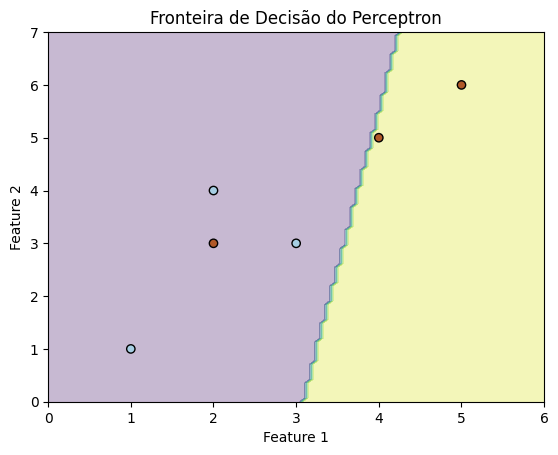

In [11]:
# Visualizando a fronteira de decisão
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Fronteira de Decisão do Perceptron")
    plt.show()

plot_decision_boundary(model, X, y)

In [12]:
# Calcula a saída da função Hinge Loss para os seguintes valores: 0, 0.2 e -10
def hinge_loss(y_true, y_pred):
  """
  Calcula a Hinge Loss.

  Args:
    y_true: O valor real (rótulo verdadeiro).
    y_pred: A previsão do modelo.

  Returns:
    O valor da Hinge Loss.
  """
  return max(0, 1 - y_true * y_pred)

# Exemplos
print(f"Hinge Loss para 0: {hinge_loss(1, 0)}")
print(f"Hinge Loss para 0.2: {hinge_loss(1, 0.2)}")
print(f"Hinge Loss para -10: {hinge_loss(1, -10)}")

Hinge Loss para 0: 1
Hinge Loss para 0.2: 0.8
Hinge Loss para -10: 11
